# State of Data 2021

### Diferenças de gênero na área de Ciência de Dados

#### Sugestões de análises:
- Diferenças gerais entre homens x mulheres de diferentes regiões do país.
    - idade
    - escolaridade / área de formação
    - experiência
    - empregados/desempregados
    - nível de cargo que ocupam
    - remuneração
    
- Diferenças na satisfação do emprego
- Forma de trabalho / ideal para entrevistado

In [108]:
import pandas as pd
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import seaborn as sns

A fazer:
- Histograma idade (Marília já fez) separado por genero
- boxplot de idade separado por genero

- escolaridade entre homens e mulheres (Malu)

- empregados x desempregados entre homens e mulheres (Malu)
- cargo/senioridade entre homens e mulheres (Malu)
- Variação de salário entre homens e mulheres por cargo/senioridade (Malu)
- Diferenças na satisfação com o emprego (Ana)
- Critérios para escolha do trabalho (Ana)

In [2]:
df = pd.read_csv('state_of_data_tradado.csv')
print(df.shape)
df.head()

(2645, 44)


,id,Idade,Faixa idade,Genero,Regiao onde mora,Regiao de origem,Mudou de Estado?,Nivel de Ensino,Área de Formação,Qual sua situação atual de trabalho?,...,Flexibilidade de trabalho remoto,Ambiente e clima de trabalho,Oportunidade de aprendizado e trabalhar com referências na área,Plano de carreira e oportunidades de crescimento profissional,Maturidade da empresa em termos de tecnologia e dados,Qualidade dos gestores e líderes,Reputação que a empresa tem no mercado,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?
0,qkx4q0ei90wcjxnqkx4q0j3xgf0zn13s,38.0,35-39,Masculino,Nordeste,Sudeste,0,Pós-graduação,Química / Física,Empregado (CLT),...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial.
1,zdl2n19yhgpnoaco6kkczdl2nwv9zwrt,39.0,35-39,Masculino,Nordeste,Sudeste,1,Pós-graduação,Economia/ Administração / Contabilidade / Fina...,Empreendedor ou Empregado (CNPJ),...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Modelo híbrido flexível (o funcionário tem lib...,Modelo 100% remoto,Vou procurar outra oportunidade no modelo 100%...
2,vsamqp2un3q7us84mgvsams5fulsmcoh,30.0,30-34,Masculino,Sul,Sul,0,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Empregado (CLT),...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Modelo 100% presencial,Modelo 100% remoto,Vou procurar outra oportunidade no modelo híbr...
3,v31ab41botodnsv31zgg4k34zzojy81l,38.0,35-39,Feminino,Sudeste,Sul,0,Pós-graduação,Outras,Empreendedor ou Empregado (CNPJ),...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou procurar outra oportunidade no modelo híbr...
4,ubhu8ntvm4xc0sfkdubhu80e973eek0k,36.0,35-39,Masculino,Sul,Sul,0,Pós-graduação,Outras Engenharias,Empreendedor ou Empregado (CNPJ),...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Modelo 100% presencial,Modelo 100% remoto,Vou procurar outra oportunidade no modelo 100%...


<AxesSubplot: xlabel='Idade', ylabel='Count'>

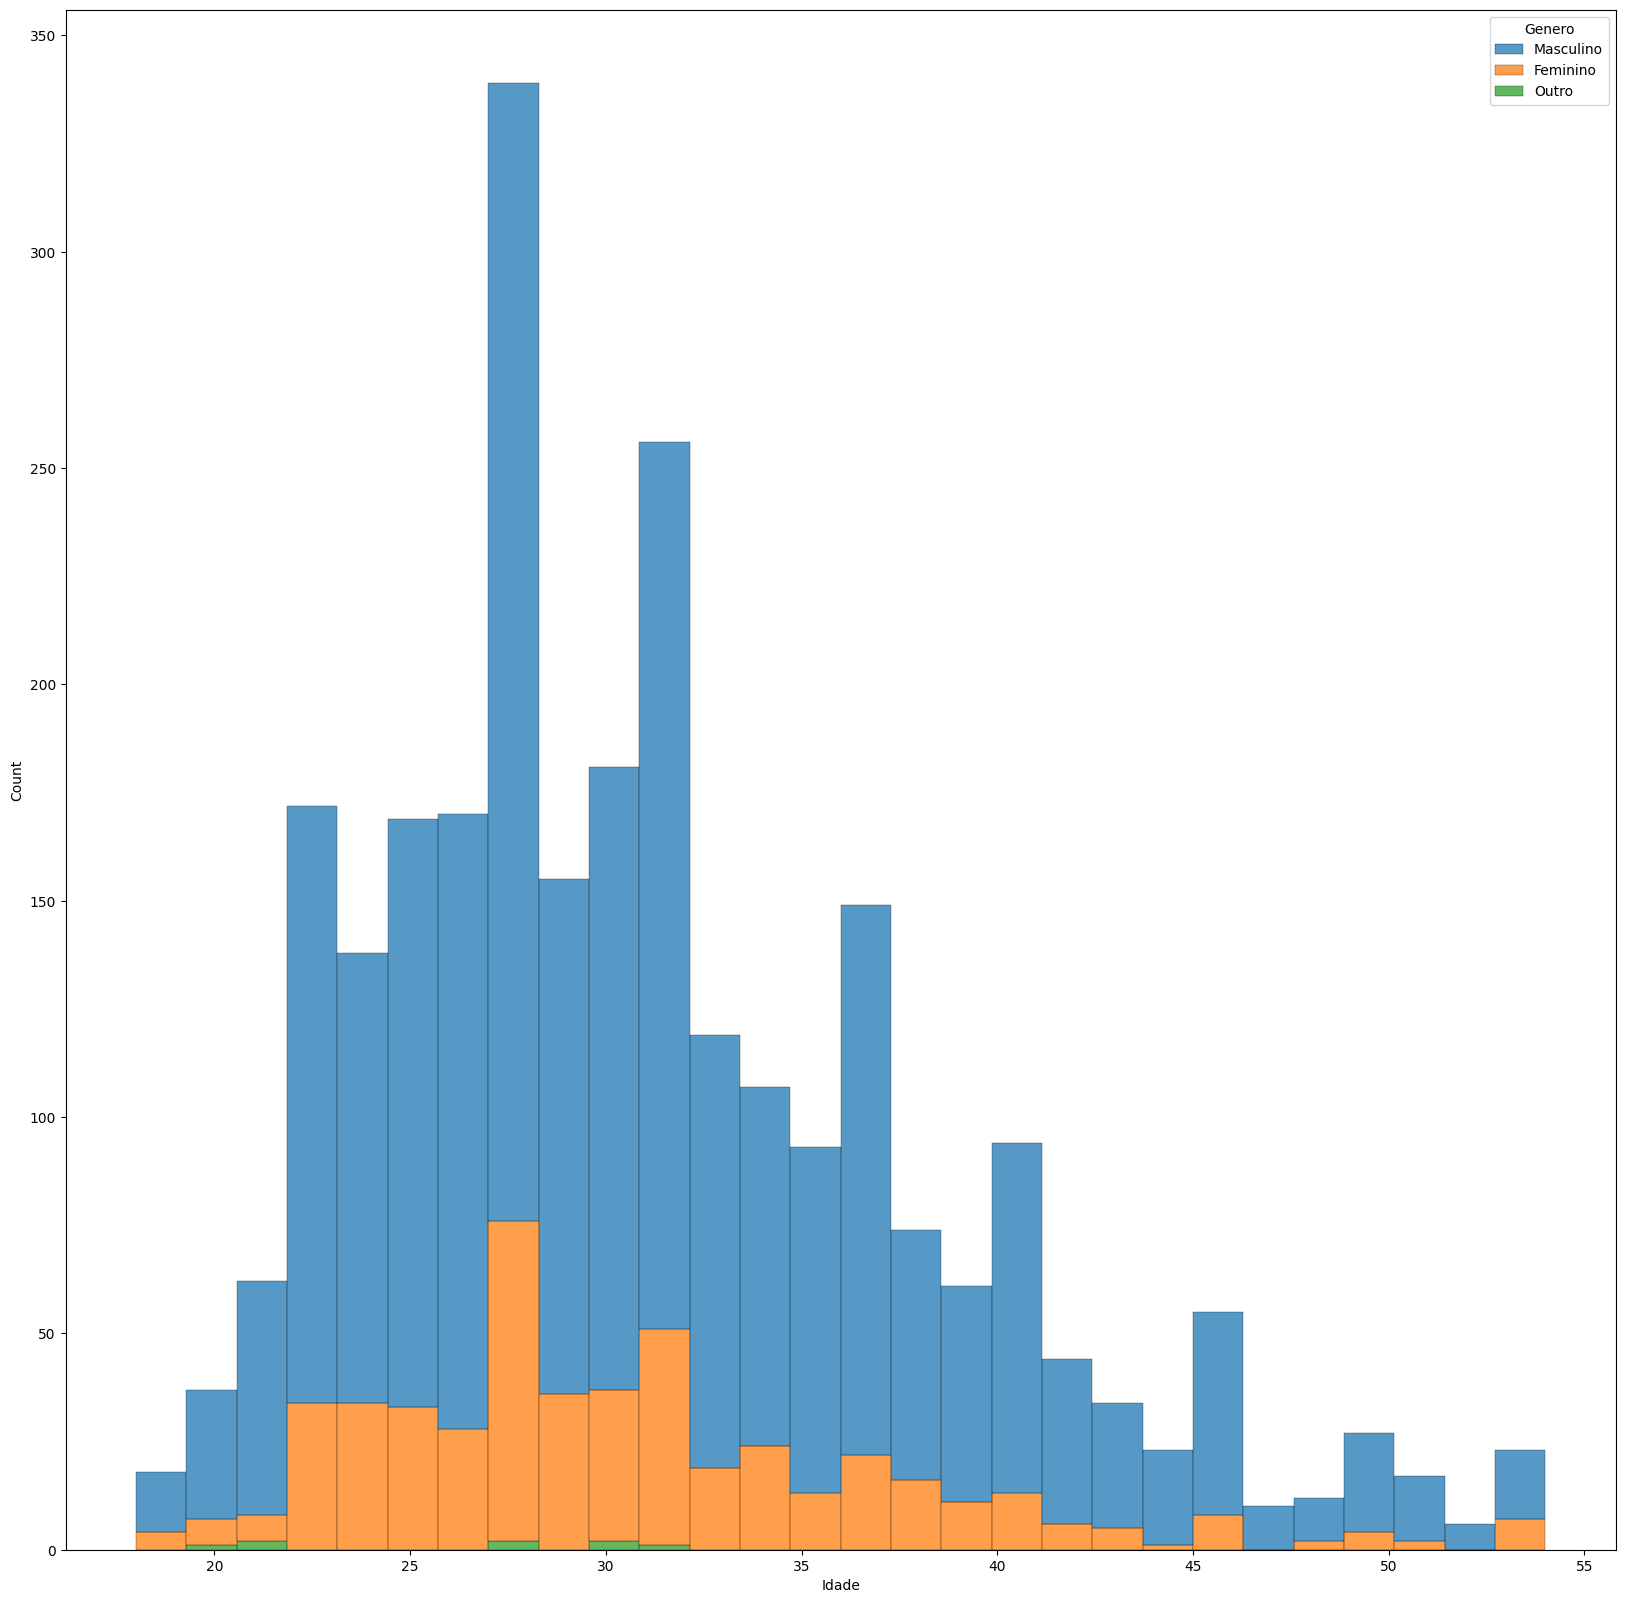

In [3]:
# sns.barplot(df_col_fitro, cmap='viridis', annot=True)
f, ax = plt.subplots(figsize=(20, 20))
sns.histplot(df,
             x="Idade", hue="Genero",
             multiple="stack",
             linewidth = 0.2)

## Insatisfação com a empresa onde trabalha atualmente.

### Nível geral de insatisfação

In [110]:
# Dividindo dataset para uso nas análises.

df_fem = df.loc[df['Genero'] == 'Feminino']
df_masc = df.loc[df['Genero'] == 'Masculino']
df_outros = df.loc[df['Genero'] == 'Outro']

In [85]:
paleta = ['rgb(36, 55, 99)', 
        'rgb(255, 110, 49)',
        'rgb(255, 235, 183)',
        'rgb(173, 142, 112)',]

fonte = {'family': "Roboto, monospace",
        'size': 20,
        'color': 'rgb(84, 3, 117)'}

In [94]:
title={'text': 'Você está satisfeito com sua empresa atual?',
       'y':0.95,
       'x':0.5,
       'xanchor': 'center',
       'yanchor': 'top'}


sat_fem = len(df_fem.loc[df_fem['Você está satisfeito na sua empresa atual?'] == 1.0])
insat_fem = len(df_fem.loc[df_fem['Você está satisfeito na sua empresa atual?'] == 0.0])

sat_masc = len(df_masc.loc[df_masc['Você está satisfeito na sua empresa atual?'] == 1.0])
insat_masc = len(df_masc.loc[df_masc['Você está satisfeito na sua empresa atual?'] == 0.0])

labels = ['Satisfeitos','Insatisfeitos']
values_f = [sat_fem , insat_fem]
values_m = [sat_masc, insat_masc]

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]], subplot_titles=['Mulheres', 'Homens'])

fig.add_trace(go.Pie(labels=labels, values=values_f, name='Nível de satisfação com a empresa entre mulheres'), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=values_m, name='Nível de satisfação com a empresa entre homens'), 1, 2)
fig.update_layout(title=title, width=1500, height=600, font=fonte)
fig.update_traces(textfont_size=20, marker_colors=paleta)

fig.show()

### Principais motivos de insatisfação.

In [194]:
columns = ['Falta de oportunidade de crescimento no emprego atual',
 'Salário atual não corresponde ao mercado',
 'Não tenho uma boa relação com meu líder/gestor',
 'Gostaria de trabalhar em em outra área de atuação',
 'Gostaria de receber mais benefícios',
 'O clima de trabalho/ambiente não é bom',
 'Falta de maturidade analítica na empresa']

labels = ['Falta de oportunidade de crescimento',
 'Salário não corresponde ao mercado',
 'Não tenho uma boa relação com meu gestor',
 'Gostaria de trabalhar em em outra área',
 'Gostaria de receber mais benefícios',
 'O clima de trabalho/ambiente não é bom',
 'Falta de maturidade analítica na empresa']

values_fem = []
values_masc = []

for column in columns:  
    values_fem.append(
        df_fem.loc[
            df_fem[column]>=0, [column]].value_counts(normalize=True)[1.0]
        )
    values_masc.append(
        df_masc.loc[
            df_masc[column]>=0, [column]].value_counts(normalize=True)[1.0]
        )
    
fig = go.Figure()


title={'text': 'Motivos de insatisfação com a empresa atual.',
       'y':0.95,
       'x':0.5,
       'xanchor': 'center',
       'yanchor': 'top'}

fonte = {'family': "Roboto, monospace",
        'size': 15,
        'color': 'rgb(84, 3, 117)'}

fig.add_trace(go.Bar(
    x=labels,
    y=values_fem,
    xaxis='x2', 
    yaxis='y2',
    name='Mulheres',
    marker_color='rgb(255, 110, 49)'
))

fig.add_trace(go.Bar(
    x=labels,
    y=values_masc,
    xaxis='x2', 
    yaxis='y2',
    name='Homens',
    marker_color='rgb(36, 55, 99)'
))

fig['layout']['yaxis2'] = {}

fig.layout.yaxis2.update({'title': 'Valor proporcional'})
fig.layout.margin.update({'t':100, 'l':100})

fig.update_layout(title=title, barmode='group', xaxis_tickangle=-45)
fig.update_layout(width=1600, height=800, font=fonte)

fig.update_layout(uniformtext_minsize=20)
fig.show()

### Critérios para escolha do trabalho

In [ ]:
questao2 = ['Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?',
 'Remuneração/Salário',
 'Benefícios',
 'Propósito do trabalho e da empresa',
 'Flexibilidade de trabalho remoto',
 'Ambiente e clima de trabalho',
 'Oportunidade de aprendizado e trabalhar com referências na área',
 'Plano de carreira e oportunidades de crescimento profissional',
 'Maturidade da empresa em termos de tecnologia e dados',
 'Qualidade dos gestores e líderes',
 'Reputação que a empresa tem no mercado']